In [120]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
os.getcwd()

'/home/julius/Documents/Studium/Master/Masterarbeit/ad_meal_prep_control/results'

In [122]:
scenario_file_names = [
    "Scenario_1a_quadratic",
    "Scenario_1b_non_robust",
    "Scenario_2c_dynamic",
]
scenario_plot_names = ["Scenario 1a", "Scenario 1b", "Scenario 2c"]

In [123]:
comp_times_all = np.array(
    [
        np.loadtxt(f"./{scenario_file_name}_mpc_computation_times_mikro_secs.txt")
        for scenario_file_name in scenario_file_names
    ]
)

In [124]:
comp_times_all = comp_times_all.T

In [125]:
comp_times_all

array([[ 120499.5 ,  112233.25, 2898646.75],
       [ 103184.  ,  113712.  , 2377299.75],
       [ 102501.  ,   96668.  , 2679397.25],
       ...,
       [ 100036.25,  103265.25, 2116535.5 ],
       [  97096.25,  103840.  , 1384178.5 ],
       [ 101618.75,  100310.25, 1543907.5 ]])

In [126]:
df = (
    pd.DataFrame(
        np.vstack([comp_times for comp_times in comp_times_all]),
    )
    / 1_000_000
)

In [127]:
df = df.loc[~(df == 0).all(axis=1)]

In [128]:
df = df.rename(
    columns={col_old: col_new for col_old, col_new in enumerate(scenario_plot_names)}
)

In [129]:
df

,Scenario 1a,Scenario 1b,Scenario 2c
0,0.120499,0.112233,2.898647
1,0.103184,0.113712,2.377300
2,0.102501,0.096668,2.679397
3,0.317344,0.093781,2.754821
4,0.100551,0.414620,2.624116
...,...,...,...
1435,0.100897,0.109717,2.024869
1436,0.103148,0.102100,2.245649
1437,0.100036,0.103265,2.116535
1438,0.097096,0.103840,1.384178


In [130]:
df_description = df.describe()

In [131]:
df_description

,Scenario 1a,Scenario 1b,Scenario 2c
count,1440.000000,1440.000000,1440.000000
mean,0.135278,0.169881,2.576336
std,0.086400,0.092395,1.040738
min,0.076478,0.078914,1.329492
25%,0.098083,0.107089,2.236168
50%,0.102737,0.135292,2.472477
75%,0.131093,0.195422,2.693867
max,1.257346,0.763258,16.038622


In [132]:
df_description = df_description.drop(["count", "25%", "75%"])

In [133]:
df_description = df_description.rename(
    index={"std": "standard deviation", "50%": "median"}
)

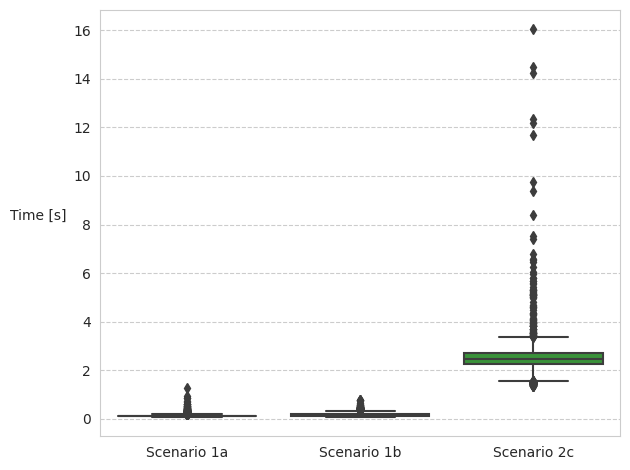

In [134]:
# Draw a vertical boxplot grouped
# by a categorical variable:

fig, ax = plt.subplots()
ax.set_ylabel("Time [s]", rotation=0, labelpad=25)
ax.grid(True, linestyle="--")
sns.set_style("whitegrid")
sns.boxplot(data=df, ax=ax)
fig.tight_layout()

fig.savefig(fname="runtime_boxplot.png", dpi=600)

In [135]:
df_description.to_latex(
    buf=f"./computation_time_stats/{scenario_file_name}.tex",
    label=f"tab:comp_stats_scenario_{scenario_file_name.split('_')[1]}",
    caption=f"Computation time statistics for scenario {scenario_file_name.split('_')[1]}",
)

NameError: name 'scenario_file_name' is not defined